In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [18]:
# Load the data
df = pd.read_csv('./data/data.csv', sep=';')
df.head()

,timestamp,V005_vent01_CO2,V022_vent02_CO2,V006_vent01_temp_out,V023_vent02_temp_out
0,23.06.2012 01:00,494.172532,405.514287,22.700000,23.449972
1,23.06.2012 02:00,491.992574,404.705170,22.700000,23.400000
2,23.06.2012 03:00,490.003467,401.981443,22.628444,23.400000
3,23.06.2012 04:00,490.972327,402.471192,22.600000,23.400000
4,23.06.2012 05:00,489.132106,403.174487,22.600000,23.349972


In [19]:
# Creating a DataFrame
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d.%m.%Y %H:%M')

# Extracting the hour from the timestamp
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].apply(lambda x: str(x).split(' ')[0])

# Melting the DataFrame for seaborn boxplot
df_melted = pd.melt(df, id_vars=['hour'], value_vars=['V005_vent01_CO2', 'V022_vent02_CO2', 'V006_vent01_temp_out', 'V023_vent02_temp_out'])


To calculate the normalized data and group multivariable V005_vent01_CO2 VS V006_vent01_temp_out and V022_vent02_CO2 vs V023_vent02_temp_out

In [20]:
###### from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

tsne_dimension_reduced_values = []
variables = ['V005_vent01_CO2', 'V022_vent02_CO2', 'V006_vent01_temp_out', 'V023_vent02_temp_out']
#variables = ['V005_vent01_CO2']

df_grouped_by_day = []

for variable in variables:
    df_grouped_by_day.append(df[[variable, 'hour', 'day']].pivot_table(values=variable, columns='hour', index='day', fill_value=0))

for i in range(len(variables)):
    tsne = PCA(n_components=1, random_state=1)
    tsne_dimension_reduced_values.append(tsne.fit_transform(df_grouped_by_day[i]))

display(tsne_dimension_reduced_values[1])
ed1 = np.column_stack([tsne_dimension_reduced_values[0], tsne_dimension_reduced_values[2]])
ed2 = np.column_stack([tsne_dimension_reduced_values[1], tsne_dimension_reduced_values[3]])

scaler = StandardScaler()
ed1_scaled = scaler.fit_transform(ed1)
ed2_scaled = scaler.fit_transform(ed2)



array([[-548.00009695],
       [-572.0595997 ],
       [-125.76314588],
       ...,
       [-179.77672024],
       [-255.37588037],
       [ 424.92605638]])

In [21]:
import plotly.express as px

fig = px.scatter(x=ed1_scaled[:, 0], y=ed1_scaled[:, 1], title=f'V005_vent01_CO2 VS V006_vent01_temp_out PCA')
fig.show()



fig = px.scatter(x=ed2_scaled[:, 0], y=ed2_scaled[:, 1], title=f'V022_vent02_CO2 vs V023_vent02_temp_out PCA')
fig.show()

Gráfico Multivariable

In [26]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from datetime import datetime

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np


K = range(2, 8)
kmeans_fits = []
agglomerative_fits = []
kmeans_score = []
agglomerative_score = []



KMEANS


C:\Users\yop_d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



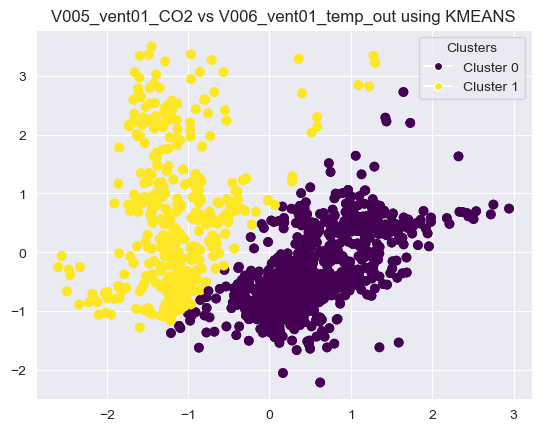

AGLOMERATIVO JERARQUICO


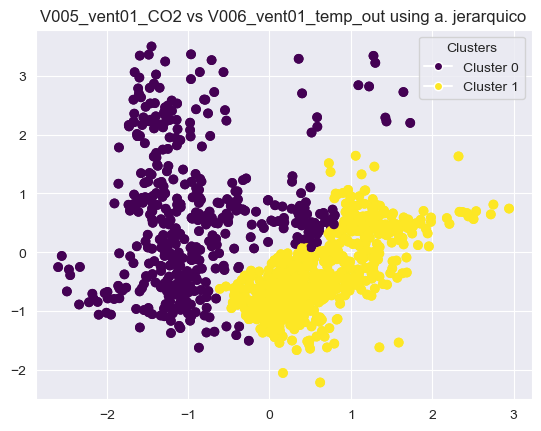

In [30]:
data = ed1_scaled

# KMEANS
print('KMEANS')
model = KMeans(n_clusters = 2, random_state = 0, n_init='auto').fit(data)
kmeans_fits.append(model)

for k in K:
    kmeans_score.append(silhouette_score(data, model.labels_, metric='euclidean'))
    
    
scatter = plt.scatter(x=data[:, 0],
                          y=data[:, 1],
                          c=model.labels_,
                          cmap='viridis')

handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', 
                        markerfacecolor=scatter.cmap(scatter.norm(cluster)))
          for cluster in np.unique(model.labels_)]
plt.legend(handles=handles, title='Clusters', loc='upper right')

plt.scatter(x=ed1_scaled[:, 0], y=ed1_scaled[:, 1], c=model.labels_, cmap='viridis')
px.scatter(x=ed1_scaled[:, 0], y=ed1_scaled[:, 1])

# for i in range(len(ed1_scaled)):
#     for j in range(len(ed1_scaled[0])):
#         plt.text(ed1_scaled[i, 0], ed1_scaled[i, 1], datetime.strptime(df_grouped_by_day[0].index[i], '%Y-%m-%d').strftime('%A') , horizontalalignment='left', size='medium', color='black', weight='semibold')
    
plt.title(f'{variables[0]} vs {variables[2]} using KMEANS')
plt.show()



data = ed1_scaled

# AGLOMERATIVO JERARQUICO
print('AGLOMERATIVO JERARQUICO')
model = AgglomerativeClustering(linkage="complete", n_clusters=2).fit(data)
agglomerative_fits.append(model)
scatter = plt.scatter(x=data[:, 0],
                          y=data[:, 1],
                          c=model.labels_,
                          cmap='viridis')

handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', 
                        markerfacecolor=scatter.cmap(scatter.norm(cluster)))
          for cluster in np.unique(model.labels_)]
plt.legend(handles=handles, title='Clusters', loc='upper right')

plt.scatter(x=ed1_scaled[:, 0], y=ed1_scaled[:, 1], c=model.labels_, cmap='viridis')
px.scatter(x=ed1_scaled[:, 0], y=ed1_scaled[:, 1])

# for i in range(len(ed1_scaled)):
#     for j in range(len(ed1_scaled[0])):
#         plt.text(ed1_scaled[i, 0], ed1_scaled[i, 1], datetime.strptime(df_grouped_by_day[0].index[i], '%Y-%m-%d').strftime('%A') , horizontalalignment='left', size='medium', color='black', weight='semibold')
    
plt.title(f'{variables[0]} vs {variables[2]} using a. jerarquico')
plt.show()


KMEANS


C:\Users\yop_d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



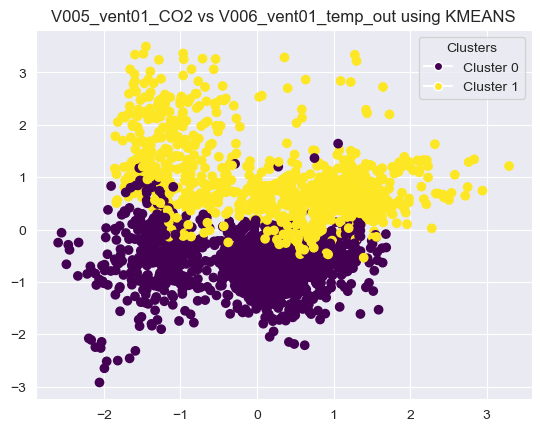

AGLOMERATIVO JERARQUICO


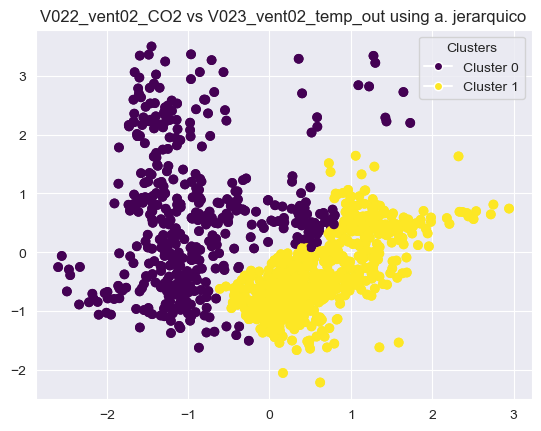

In [31]:
data = ed2_scaled

# KMEANS
print('KMEANS')
model = KMeans(n_clusters = 2, random_state = 0, n_init='auto').fit(data)
kmeans_fits.append(model)
scatter = plt.scatter(x=data[:, 0],
                          y=data[:, 1],
                          c=model.labels_,
                          cmap='viridis')

handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', 
                        markerfacecolor=scatter.cmap(scatter.norm(cluster)))
          for cluster in np.unique(model.labels_)]
plt.legend(handles=handles, title='Clusters', loc='upper right')

plt.scatter(x=ed1_scaled[:, 0], y=ed1_scaled[:, 1], c=model.labels_, cmap='viridis')
px.scatter(x=ed1_scaled[:, 0], y=ed1_scaled[:, 1])

# for i in range(len(ed1_scaled)):
#     for j in range(len(ed1_scaled[0])):
#         plt.text(ed1_scaled[i, 0], ed1_scaled[i, 1], datetime.strptime(df_grouped_by_day[0].index[i], '%Y-%m-%d').strftime('%A') , horizontalalignment='left', size='medium', color='black', weight='semibold')
    
plt.title(f'{variables[0]} vs {variables[2]} using KMEANS')
plt.show()



data = ed1_scaled

# AGLOMERATIVO JERARQUICO
print('AGLOMERATIVO JERARQUICO')
model = AgglomerativeClustering(linkage="complete", n_clusters=2).fit(data)
agglomerative_fits.append(model)

scatter = plt.scatter(x=data[:, 0],
                          y=data[:, 1],
                          c=model.labels_,
                          cmap='viridis')

handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', 
                        markerfacecolor=scatter.cmap(scatter.norm(cluster)))
          for cluster in np.unique(model.labels_)]
plt.legend(handles=handles, title='Clusters', loc='upper right')

plt.scatter(x=ed1_scaled[:, 0], y=ed1_scaled[:, 1], c=model.labels_, cmap='viridis')
px.scatter(x=ed1_scaled[:, 0], y=ed1_scaled[:, 1])

# for i in range(len(ed1_scaled)):
#     for j in range(len(ed1_scaled[0])):
#         plt.text(ed1_scaled[i, 0], ed1_scaled[i, 1], datetime.strptime(df_grouped_by_day[0].index[i], '%Y-%m-%d').strftime('%A') , horizontalalignment='left', size='medium', color='black', weight='semibold')
    
plt.title(f'{variables[1]} vs {variables[3]} using a. jerarquico')
plt.show()
